Работа с данными

Предположим в июле провели специальную акцию, направленную на улучшение ретеншена. Новым юзерам слали письмо с купоном. Сработала ли акция?

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r'C:\Users\Lily_B\Documents\аналитика на python\analyst_test_transactions_db.csv')

In [4]:
df.head()

,user_id,order_id,reg_date,transaction_date,revenue
0,57562,94545.0,2013-12-22,2015-07-16,1088
1,40047,81824.0,2013-11-24,2015-01-19,1027
2,48153,144851.0,2015-07-03,2015-10-29,601
3,54591,116111.0,2013-07-12,2015-04-30,881
4,39789,134943.0,2013-05-25,2015-07-21,984


In [5]:
len(df)

76857

In [6]:
df.dtypes

user_id               int64
order_id            float64
reg_date             object
transaction_date     object
revenue               int64
dtype: object

Преобразуем дату.

In [7]:
df['reg_date'] = pd.to_datetime(df['reg_date'],format='%Y-%m-%d')
df['transaction_date'] = pd.to_datetime(df['transaction_date'],format='%Y-%m-%d')

Нужен июль 2015. Только в нем есть транзакции.

In [8]:
df['reg_date'].agg(['min','max'])

min   1900-01-01
max   2015-11-20
Name: reg_date, dtype: datetime64[ns]

In [9]:
df['reg_month'] = df['reg_date'].astype('datetime64[M]')

Посмотрим количество уникальных пользователей.

In [10]:
df.groupby(['reg_month'])['user_id'].agg(['count','nunique'])

,count,nunique
reg_month,,
1900-01-01,53,53
2012-02-01,9,9
2012-03-01,362,361
2012-04-01,370,370
2012-05-01,301,301
2012-06-01,445,443
2012-07-01,370,369
2012-08-01,271,269
2012-09-01,356,355


In [11]:
df['transaction_month'] = df['transaction_date'].astype('datetime64[M]')

In [12]:
df.groupby(['transaction_month'])['user_id'].agg(['count','nunique'])

,count,nunique
transaction_month,,
2015-01-01,4058,3951
2015-02-01,4932,4777
2015-03-01,5824,5599
2015-04-01,6102,5862
2015-05-01,6339,6063
2015-06-01,6829,6480
2015-07-01,7520,7166
2015-08-01,8598,8110
2015-09-01,8468,7964


Посмотрим количество уникальных клиентов.

In [13]:
df['user_id'].nunique()

48214

Количество месяцев.


In [14]:
len(df.groupby(['reg_month'])['user_id'].agg(['count','nunique']))

47

Для каждого пользователя сделаем месяц его жизни.

Посмотрим есть ли отрицательные user_id. Кажется, их генерировали из нормального распределения. Доход тоже сгенерирован нормально, как и id заказов.

<AxesSubplot:>

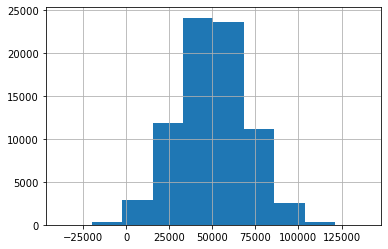

In [15]:
df['user_id'].hist()

<AxesSubplot:>

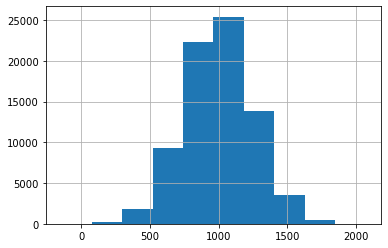

In [16]:
df['revenue'].hist()

<AxesSubplot:>

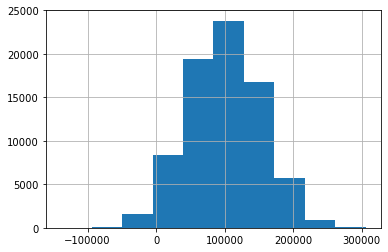

In [17]:
df['order_id'].hist()

Возьмем минимальный месяц регистрации юзеров.

In [20]:
users = df.groupby('user_id')['reg_month'].min().reset_index()
users

,user_id,reg_month
0,-37599,2015-01-01
1,-32239,2015-11-01
2,-29822,2015-07-01
3,-29531,2014-09-01
4,-25337,2015-04-01
...,...,...
48209,128964,2015-10-01
48210,130617,2015-02-01
48211,131071,2012-04-01
48212,132484,2015-06-01


In [21]:
len(df.groupby(['transaction_month'])['user_id'].agg(['count','nunique']))

11

In [22]:
min_date = df['transaction_month'].min()
max_date = df['transaction_month'].max()

In [23]:
min_date

Timestamp('2015-01-01 00:00:00')

In [24]:
max_date

Timestamp('2015-11-01 00:00:00')

Возьмем минимальную и максимальную дату и сделаем календарь.

In [26]:
month = pd.DataFrame(pd.date_range(min_date,max_date,freq='MS'))
month

,0
0,2015-01-01
1,2015-02-01
2,2015-03-01
3,2015-04-01
4,2015-05-01
5,2015-06-01
6,2015-07-01
7,2015-08-01
8,2015-09-01
9,2015-10-01


In [27]:
month.columns = ['month']

Сделаем cross join таблицы month с таблицей users.

In [28]:
user['key'] = 1
month['key'] = 1

In [30]:
template = user.merge(month,on='key')[['user_id','reg_month','month']]
template

,user_id,reg_month,month
0,-37599,2015-01-01,2015-01-01
1,-37599,2015-01-01,2015-02-01
2,-37599,2015-01-01,2015-03-01
3,-37599,2015-01-01,2015-04-01
4,-37599,2015-01-01,2015-05-01
...,...,...,...
530349,138987,2014-10-01,2015-07-01
530350,138987,2014-10-01,2015-08-01
530351,138987,2014-10-01,2015-09-01
530352,138987,2014-10-01,2015-10-01


In [31]:
template = template[template['month'] >= template['reg_month']]
template

,user_id,reg_month,month
0,-37599,2015-01-01,2015-01-01
1,-37599,2015-01-01,2015-02-01
2,-37599,2015-01-01,2015-03-01
3,-37599,2015-01-01,2015-04-01
4,-37599,2015-01-01,2015-05-01
...,...,...,...
530349,138987,2014-10-01,2015-07-01
530350,138987,2014-10-01,2015-08-01
530351,138987,2014-10-01,2015-09-01
530352,138987,2014-10-01,2015-10-01


In [32]:
trans_month = df.groupby(['user_id','transaction_month'])['revenue'].sum().reset_index()
trans_month

,user_id,transaction_month,revenue
0,-37599,2015-03-01,1182
1,-32239,2015-11-01,727
2,-29822,2015-09-01,908
3,-29531,2015-06-01,1462
4,-25337,2015-07-01,899
...,...,...,...
73027,128964,2015-10-01,1049
73028,130617,2015-06-01,1295
73029,131071,2015-10-01,856
73030,132484,2015-08-01,747


In [33]:
trans_month.columns = ['user_id','month','revenue']

In [35]:
report = template.merge(trans_month,on=['user_id','month'],how='left')
report

,user_id,reg_month,month,revenue
0,-37599,2015-01-01,2015-01-01,NaN
1,-37599,2015-01-01,2015-02-01,NaN
2,-37599,2015-01-01,2015-03-01,1182.0
3,-37599,2015-01-01,2015-04-01,NaN
4,-37599,2015-01-01,2015-05-01,NaN
...,...,...,...,...
467620,138987,2014-10-01,2015-07-01,NaN
467621,138987,2014-10-01,2015-08-01,NaN
467622,138987,2014-10-01,2015-09-01,NaN
467623,138987,2014-10-01,2015-10-01,NaN


In [37]:
report['active'] = (report['revenue'] > 0)*1
report

,user_id,reg_month,month,revenue,active
0,-37599,2015-01-01,2015-01-01,NaN,0
1,-37599,2015-01-01,2015-02-01,NaN,0
2,-37599,2015-01-01,2015-03-01,1182.0,1
3,-37599,2015-01-01,2015-04-01,NaN,0
4,-37599,2015-01-01,2015-05-01,NaN,0
...,...,...,...,...,...
467620,138987,2014-10-01,2015-07-01,NaN,0
467621,138987,2014-10-01,2015-08-01,NaN,0
467622,138987,2014-10-01,2015-09-01,NaN,0
467623,138987,2014-10-01,2015-10-01,NaN,0


Сделаем сводные таблицы.

In [38]:
# кол-во людей
report.pivot_table(index='reg_month',columns='month',values='active',aggfunc='count')

month,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01
reg_month,,,,,,,,,,,
1900-01-01,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0
2012-02-01,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
2012-03-01,361.0,361.0,361.0,361.0,361.0,361.0,361.0,361.0,361.0,361.0,361.0
2012-04-01,369.0,369.0,369.0,369.0,369.0,369.0,369.0,369.0,369.0,369.0,369.0
2012-05-01,298.0,298.0,298.0,298.0,298.0,298.0,298.0,298.0,298.0,298.0,298.0
2012-06-01,436.0,436.0,436.0,436.0,436.0,436.0,436.0,436.0,436.0,436.0,436.0
2012-07-01,359.0,359.0,359.0,359.0,359.0,359.0,359.0,359.0,359.0,359.0,359.0
2012-08-01,264.0,264.0,264.0,264.0,264.0,264.0,264.0,264.0,264.0,264.0,264.0
2012-09-01,345.0,345.0,345.0,345.0,345.0,345.0,345.0,345.0,345.0,345.0,345.0


In [39]:
# кол-во активных людей
report.pivot_table(index='reg_month',columns='month',values='active',aggfunc='sum')

month,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01
reg_month,,,,,,,,,,,
1900-01-01,8.0,9.0,18.0,8.0,9.0,13.0,6.0,5.0,5.0,9.0,5.0
2012-02-01,1.0,2.0,1.0,0.0,4.0,2.0,2.0,2.0,2.0,0.0,2.0
2012-03-01,53.0,57.0,45.0,55.0,53.0,66.0,61.0,70.0,64.0,106.0,58.0
2012-04-01,54.0,51.0,85.0,62.0,62.0,63.0,63.0,61.0,65.0,89.0,66.0
2012-05-01,29.0,47.0,50.0,56.0,56.0,54.0,53.0,74.0,52.0,63.0,54.0
2012-06-01,51.0,62.0,64.0,90.0,75.0,70.0,71.0,69.0,86.0,106.0,77.0
2012-07-01,49.0,51.0,55.0,63.0,60.0,55.0,65.0,69.0,53.0,94.0,67.0
2012-08-01,21.0,40.0,49.0,53.0,40.0,40.0,51.0,57.0,54.0,66.0,50.0
2012-09-01,54.0,45.0,53.0,66.0,57.0,59.0,50.0,60.0,57.0,67.0,50.0


In [41]:
# процент актвных людей 
retention = report.pivot_table(index='reg_month',columns='month',values='active',aggfunc='mean')

In [46]:
retention

month,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01
reg_month,,,,,,,,,,,
1900-01-01,0.150943,0.169811,0.339623,0.150943,0.169811,0.245283,0.113208,0.094340,0.094340,0.169811,0.094340
2012-02-01,0.111111,0.222222,0.111111,0.000000,0.444444,0.222222,0.222222,0.222222,0.222222,0.000000,0.222222
2012-03-01,0.146814,0.157895,0.124654,0.152355,0.146814,0.182825,0.168975,0.193906,0.177285,0.293629,0.160665
2012-04-01,0.146341,0.138211,0.230352,0.168022,0.168022,0.170732,0.170732,0.165312,0.176152,0.241192,0.178862
2012-05-01,0.097315,0.157718,0.167785,0.187919,0.187919,0.181208,0.177852,0.248322,0.174497,0.211409,0.181208
2012-06-01,0.116972,0.142202,0.146789,0.206422,0.172018,0.160550,0.162844,0.158257,0.197248,0.243119,0.176606
2012-07-01,0.136490,0.142061,0.153203,0.175487,0.167131,0.153203,0.181058,0.192201,0.147632,0.261838,0.186630
2012-08-01,0.079545,0.151515,0.185606,0.200758,0.151515,0.151515,0.193182,0.215909,0.204545,0.250000,0.189394
2012-09-01,0.156522,0.130435,0.153623,0.191304,0.165217,0.171014,0.144928,0.173913,0.165217,0.194203,0.144928


Можно увидеть, что в июле 15 года наблюдается прирост числа новых пользователей.В последующих месяцах также наблюается прирост. Посмтроим тепловую карту.

In [45]:
import numpy as np
import seaborn as sns
uniform_data = np.random.rand(10, 12)
#ax = sns.heatmap(uniform_data)

In [43]:
sns.set(font_scale=2,style="whitegrid",rc={'figure.figsize':(12,6)} )

<AxesSubplot:xlabel='month', ylabel='reg_month'>

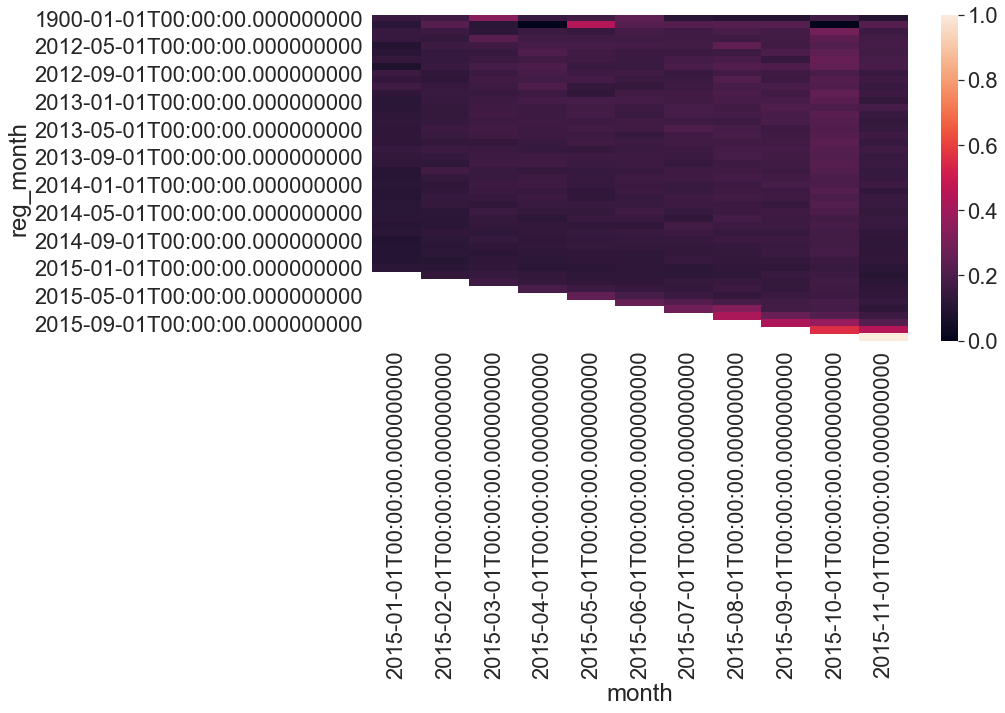

In [44]:
sns.heatmap(retention)

Посмотрим только 15 год. Посчитаем разницу между transaction month и reg date

In [47]:
report['lifetime'] = ((report['month'] - report['reg_month'])/np.timedelta64(1, 'M')).round().astype(int)

In [48]:
report[report['user_id'] == 128006]

,user_id,reg_month,month,revenue,active,lifetime
467563,128006,2015-01-01,2015-01-01,NaN,0,0
467564,128006,2015-01-01,2015-02-01,539.0,1,1
467565,128006,2015-01-01,2015-03-01,NaN,0,2
467566,128006,2015-01-01,2015-04-01,NaN,0,3
467567,128006,2015-01-01,2015-05-01,NaN,0,4
467568,128006,2015-01-01,2015-06-01,NaN,0,5
467569,128006,2015-01-01,2015-07-01,NaN,0,6
467570,128006,2015-01-01,2015-08-01,NaN,0,7
467571,128006,2015-01-01,2015-09-01,NaN,0,8
467572,128006,2015-01-01,2015-10-01,NaN,0,9


In [49]:
report['reg_month_str'] = report['reg_month'].dt.strftime('%Y-%m')

In [51]:
retention = report[report['reg_month'] >= '2015-01-01'].pivot_table(index='reg_month',columns='lifetime',values='active',aggfunc='mean')
retention

lifetime,0,1,2,3,4,5,6,7,8,9,10
reg_month,,,,,,,,,,,
2015-01-01,0.116928,0.116056,0.129581,0.116492,0.115183,0.124782,0.118237,0.131326,0.126091,0.148778,0.114311
2015-02-01,0.132856,0.141543,0.135922,0.121615,0.122126,0.119571,0.123659,0.149208,0.163005,0.105263,NaN
2015-03-01,0.164114,0.138403,0.129650,0.127462,0.138403,0.145514,0.138950,0.170678,0.117068,NaN,NaN
2015-04-01,0.193627,0.158088,0.144608,0.136029,0.161152,0.137255,0.167892,0.127451,NaN,NaN,NaN
2015-05-01,0.246457,0.184252,0.154331,0.136220,0.152756,0.159055,0.132283,NaN,NaN,NaN,NaN
2015-06-01,0.257924,0.216283,0.180236,0.168428,0.189559,0.141703,NaN,NaN,NaN,NaN,NaN
2015-07-01,0.283110,0.331367,0.179088,0.181769,0.124397,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01,0.423358,0.268613,0.222628,0.157664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-01,0.429314,0.381497,0.221414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='lifetime', ylabel='reg_month'>

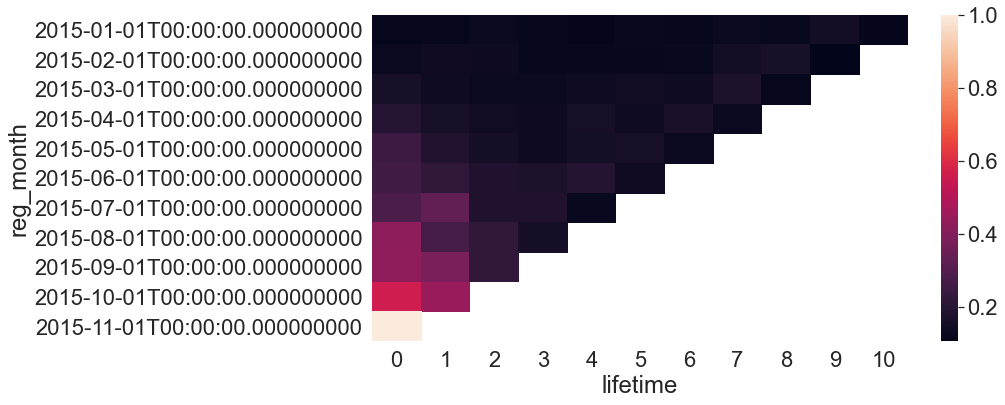

In [52]:
sns.heatmap(retention)

retention повышается с июля.

In [53]:
import sqlite3

In [54]:
con = sqlite3.connect('db')

In [55]:
cur = con.cursor()

In [56]:
def select(sql):
  return pd.read_sql(sql,con)

In [57]:
df = pd.read_csv(r'C:\Users\Lily_B\Documents\аналитика на python\analyst_test_transactions_db.csv')

In [58]:
df['reg_date'] = pd.to_datetime(df['reg_date'],format='%Y-%m-%d')
df['transaction_date'] = pd.to_datetime(df['transaction_date'],format='%Y-%m-%d')

In [59]:
df.to_sql('trans',con,index=False,if_exists='replace')

In [60]:
sql = ''' select * from trans t'''

In [61]:
select(sql)

,user_id,order_id,reg_date,transaction_date,revenue
0,57562,94545.0,2013-12-22 00:00:00,2015-07-16 00:00:00,1088
1,40047,81824.0,2013-11-24 00:00:00,2015-01-19 00:00:00,1027
2,48153,144851.0,2015-07-03 00:00:00,2015-10-29 00:00:00,601
3,54591,116111.0,2013-07-12 00:00:00,2015-04-30 00:00:00,881
4,39789,134943.0,2013-05-25 00:00:00,2015-07-21 00:00:00,984
...,...,...,...,...,...
76852,36921,163682.0,2015-01-15 00:00:00,2015-03-28 00:00:00,1095
76853,31360,145146.0,2015-01-04 00:00:00,2015-08-09 00:00:00,547
76854,56195,8929.0,2012-09-18 00:00:00,2015-11-12 00:00:00,850
76855,46362,78673.0,2015-02-20 00:00:00,2015-07-21 00:00:00,356
